# Image Theme - TP 2 - Using Histograms for Image Correction and Processing

* Vérifiez que vous vous trouvez bien dans le dossier de travail pour ce TP
* Si ça n'est pas le cas, pour y accèder utilisez les commandes `pwd` (print working directory), `cd` (change directory) et `ls`(list contents) pour naviguer sur le disque.
* Changez de repertoire jusqu'a voir tous les fichiers necessaires au TP.
* Importez les modules dont vous aurez besoin en exécutant la cellule suivante (`Ctrl+Enter`).
* Familiarisez vous avec les fonctions mises à votre disposition dans le fichier `utils.py`; elles vous seront utiles pour la suite!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from utils import *

test_utils()
plt.ion()
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline





Test utils ok


## Histogramme et histogramme cumulé

### Histogramme

Python possède des instructions (dans la librairie `numpy`; voir le fichier `utils.py`) permettant de calculer automatiquement l'histogramme d'une image. Utiliser ces fonctions revient à utiliser une "boîte noire" dont on ne connaît pas le fonctionnement interne.

Nous utiliserons des boîtes noires plus tard afin de gagner du temps (et parce que leur implémentation est souvent très optimisée), mais nous allons aussi re-coder certains algorithmes (en "boîtes blanches") afin de bien en comprendre le fonctionnement.

Nous pourrons alors comparer les résultats produits par une boîte noire à ceux produits par notre boîte blanche, afin de vérifier que notre implémentation est correcte.

#### Exercice 1 : Tracés d'histogrammes

Dans le cas des images, nous voulons compter le nombre de pixels dont la valeur est $p$, $\forall p \in \lbrace 0,\ldots,255\rbrace$.

Affichez les images suivantes et tracez leurs histogrammes :

`papillon.bmp`, `fruits.bmp`, `manoir.bmp`, `desert.bmp`

Commentez l'aspect général des images et l'allure de leurs
histogrammes.

Difference entre black box et white box=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Difference entre black box et white box=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

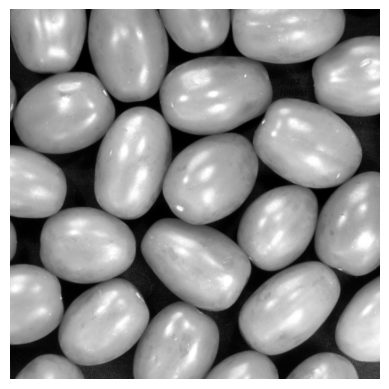

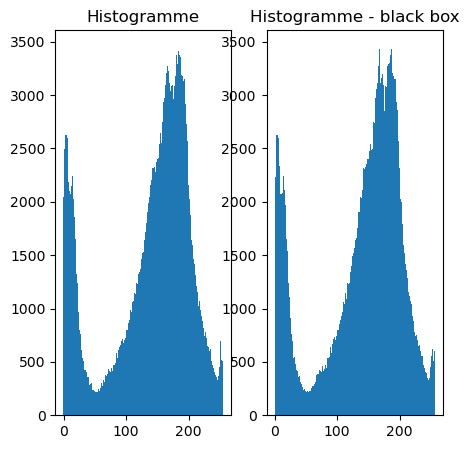

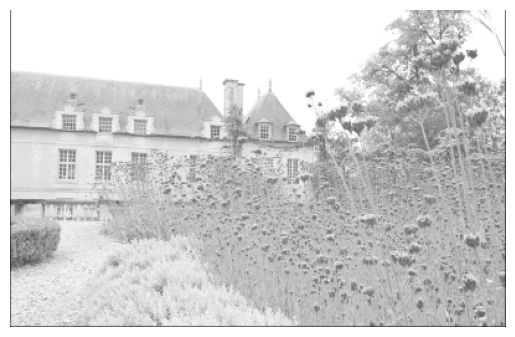

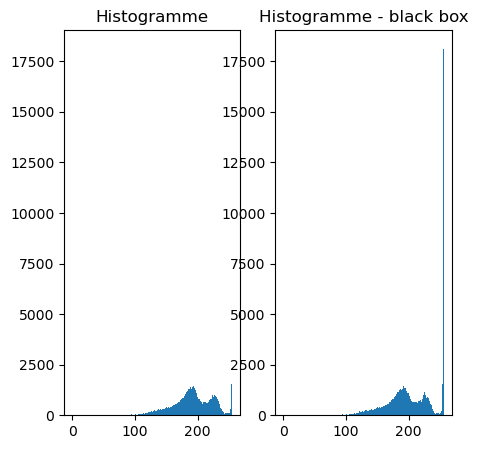

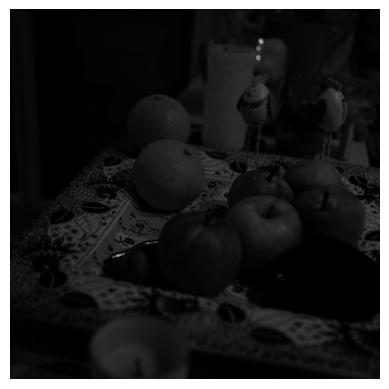

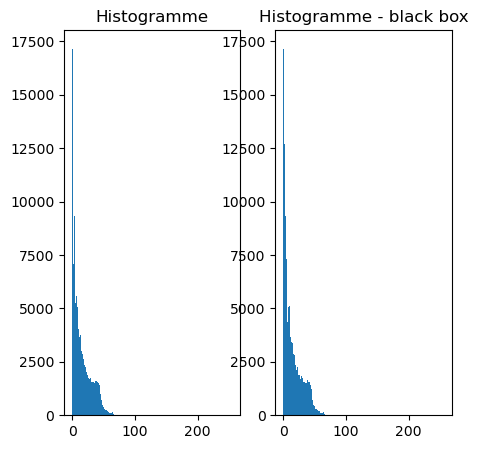

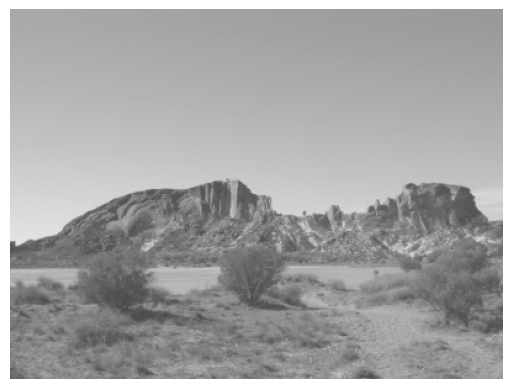

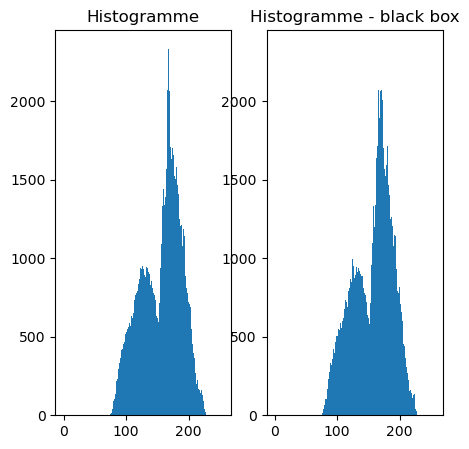

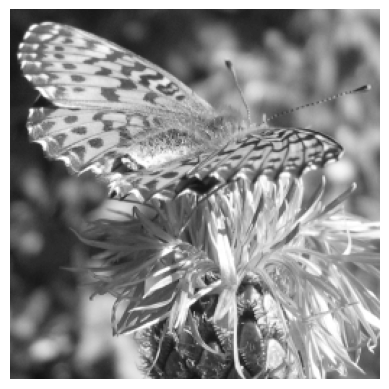

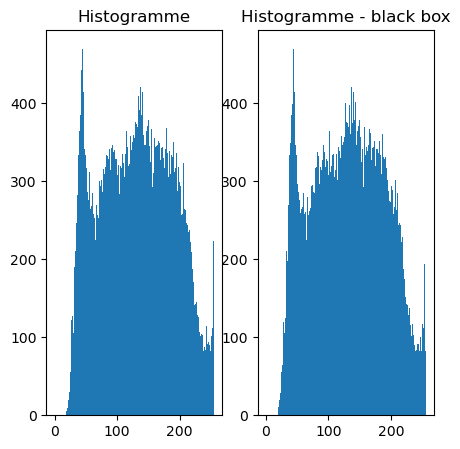

In [2]:
# Charger et afficher l'image
img = np.array(plt.imread('./tomates.bmp'))
fig,ax = plt.subplots()
ax.imshow(img,vmin=0,vmax=255)
ax.set_axis_off()

# Compute histogram from scratch
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i,j]] = hist[img[i,j]]+1
        
# Show histogram
fig,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].bar(range(256),hist,width=1, align='center')
ax[0].set_title('Histogramme')

# Il existe dans dans matplotlib une fonction graphique pour calculer et afficher l'histogramme en 1 ligne.
# Veillez à bien maitriser ces commandes. Elles seront très utiles dans la suite.
black_box_hist,_,_ = ax[1].hist(img.flatten(),bins=256, width=1,range=(0,256))
ax[1].set_title('Histogramme - black box')

# Comparer les resultats black box et white box
print(f'Difference entre black box et white box=\n{black_box_hist - hist}')
########
# Charger et afficher l'image
img = np.array(plt.imread('./manoir.bmp'))
fig,ax = plt.subplots()
ax.imshow(img,vmin=0,vmax=255)
ax.set_axis_off()

# Compute histogram from scratch
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i,j]] = hist[img[i,j]]+1
        
# Show histogram
fig,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].bar(range(256),hist,width=1, align='center')
ax[0].set_title('Histogramme')

# Il existe dans dans matplotlib une fonction graphique pour calculer et afficher l'histogramme en 1 ligne.
# Veillez à bien maitriser ces commandes. Elles seront très utiles dans la suite.
black_box_hist,_,_ = ax[1].hist(img.flatten(),bins=256, width=1,range=(0,256))
ax[1].set_title('Histogramme - black box')

# Comparer les resultats black box et white box
print(f'Difference entre black box et white box=\n{black_box_hist - hist}')
#####
# Charger et afficher l'image
img = np.array(plt.imread('./fruits.bmp'))
fig,ax = plt.subplots()
ax.imshow(img,vmin=0,vmax=255)
ax.set_axis_off()

# Compute histogram from scratch
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i,j]] = hist[img[i,j]]+1
        
# Show histogram
fig,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].bar(range(256),hist,width=1, align='center')
ax[0].set_title('Histogramme')

# Il existe dans dans matplotlib une fonction graphique pour calculer et afficher l'histogramme en 1 ligne.
# Veillez à bien maitriser ces commandes. Elles seront très utiles dans la suite.
black_box_hist,_,_ = ax[1].hist(img.flatten(),bins=256, width=1,range=(0,256))
ax[1].set_title('Histogramme - black box')

# Comparer les resultats black box et white box
print(f'Difference entre black box et white box=\n{black_box_hist - hist}')
########
# Charger et afficher l'image
img = np.array(plt.imread('./desert.bmp'))
fig,ax = plt.subplots()
ax.imshow(img,vmin=0,vmax=255)
ax.set_axis_off()

# Compute histogram from scratch
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i,j]] = hist[img[i,j]]+1
        
# Show histogram
fig,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].bar(range(256),hist,width=1, align='center')
ax[0].set_title('Histogramme')

# Il existe dans dans matplotlib une fonction graphique pour calculer et afficher l'histogramme en 1 ligne.
# Veillez à bien maitriser ces commandes. Elles seront très utiles dans la suite.
black_box_hist,_,_ = ax[1].hist(img.flatten(),bins=256, width=1,range=(0,256))
ax[1].set_title('Histogramme - black box')

# Comparer les resultats black box et white box
print(f'Difference entre black box et white box=\n{black_box_hist - hist}')
######
# Charger et afficher l'image
img = np.array(plt.imread('./papillon.bmp'))
fig,ax = plt.subplots()
ax.imshow(img,vmin=0,vmax=255)
ax.set_axis_off()

# Compute histogram from scratch
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i,j]] = hist[img[i,j]]+1
        
# Show histogram
fig,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].bar(range(256),hist,width=1, align='center')
ax[0].set_title('Histogramme')

# Il existe dans dans matplotlib une fonction graphique pour calculer et afficher l'histogramme en 1 ligne.
# Veillez à bien maitriser ces commandes. Elles seront très utiles dans la suite.
black_box_hist,_,_ = ax[1].hist(img.flatten(),bins=256, width=1,range=(0,256))
ax[1].set_title('Histogramme - black box')

# Comparer les resultats black box et white box
print(f'Difference entre black box et white box=\n{black_box_hist - hist}')

# Exercice 2
## Effet d'une transformation sur l'histogramme
On considère les fonctions de transformation suivantes :
* $f_1(p) = p + 50 $
* $f_3(p) = 0.5(p-127) + 127 $
* $f_5(p) = 2(p-127) + 127 $

Modifez le code ci-dessous pour appliquer ces transformations à quelques images.
    
Affichez les images transformées et leurs histogrammes, et commentez la différence par rapport à l'original.

Dans quels cas y a-t-il perte d'information par saturation des valeurs à 0 ou 255 ?

Que se passe-t-il si on évite le bloc "clip" en entrant clip = False ?

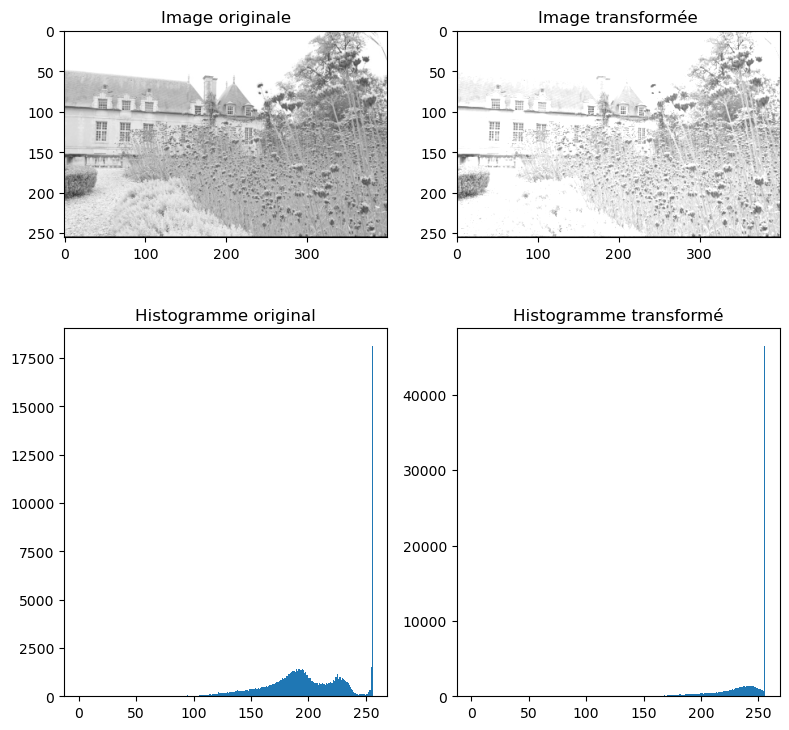

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

def f1(p):
    return p + 50

def f2(p):
    return 0.5 * p + 63.5

def f5_3(p):
    return 2 * p - 127

# Charger et afficher l'image
img = np.array(plt.imread('./manoir.bmp'))
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Image originale')

# Afficher l'histogramme de l'image originale
hist, _, _ = ax[1, 0].hist(img.flatten(), bins=256, range=(0, 256), width=1,)
ax[1, 0].set_title('Histogramme original')

# Appliquer la transformation
img_2 = copy(img)
clip = True
for i in range(img_2.shape[0]):
    for j in range(img_2.shape[1]):
        # Choisir la fonction à appliquer ici
        new_val = f1(img_2[i, j])
        # Clipper les valeurs pour rester dans [0, 255]
        if clip:
            if new_val > 255:
                img_2[i, j] = 255
            elif new_val < 0:
                img_2[i, j] = 0
            else:
                img_2[i, j] = new_val
        else:
            img_2[i, j] = new_val

# Afficher l'image transformée
ax[0, 1].imshow(img_2)
ax[0, 1].set_title('Image transformée')

# Afficher l'histogramme de l'image transformée
hist_2, _, _ = ax[1, 1].hist(img_2.flatten(), bins=256, range=(0, 256), width=1, )
ax[1, 1].set_title('Histogramme transformé')

plt.tight_layout()
plt.show()



# Exercice 3
## Histogramme cumulé

Etant donné l'histogramme $h(p)$ d'une image, l'histogramme cumulé
peut être défini de deux manières.
1. Par une formule explicite
$(\star) H(p) = \sum_{q = 0}^{p}h(q), \ \forall p \in\lbrace 0,\ldots, 255\rbrace.$

2. Par récurrence : $H(0) = h(0)$ et pour $p\in{1, \ldots, 255}, H(p) = H(p-1) + h(p)$.

En pratique, l'histogramme cumulé $H$ est stocké sous la forme d'un tableau
à 256 entrées, comme l'histogramme $h$ que vous avez déjà calculé, il faut faire attention aux indices !

Completez la cellule ci-dessous pour qu'elle réalise le calcul de l'histogramme cumulé, puis testez votre fonction.

Quelle est la valeur du dernier élément du tableau $H$ ? A quoi correspond-elle ?

[2025-01-28 09:43:35.016] hist LENT: start
[2025-01-28 09:43:35.019] hist LENT: end
[2025-01-28 09:43:35.019] hist RAPIDE: start
[2025-01-28 09:43:35.020] hist RAPIDE: end


Text(0.5, 1.0, 'Histogramme CUMULE de Papillon - rapide')

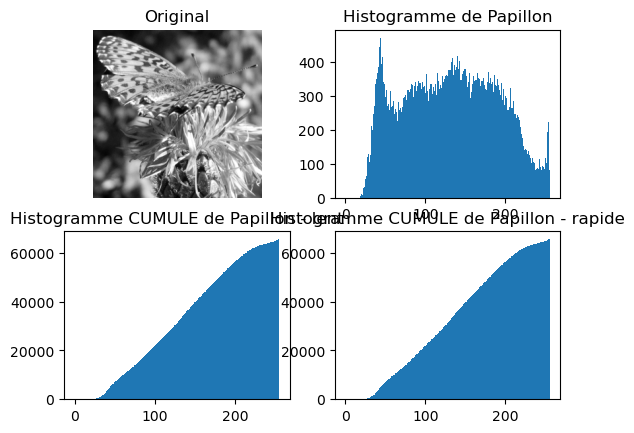

In [5]:
# Charger et afficher l'image
img = np.array(plt.imread('papillon.bmp'))
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img)
ax[0,0].set_axis_off()
ax[0,0].set_title('Original')

# Calculer l'histogramme: white box (on en aura besoin plus bas)
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] += 1

# Afficher l'histogramme
_ = ax[0,1].bar(range(256),hist,width=1,align='center')
ax[0,1].set_title('Histogramme de Papillon')

# Histogramme cumule: calcul lent (méthode 1, lente)
print_timestamp('hist LENT: start')
H_1 = np.zeros(256)
# A COMPLETER
H_1 = np.zeros(256)
for p in range(256):
    H_1[p] = np.sum(hist[:p+1]) 

print_timestamp('hist LENT: end')

# Histogramme cumule: calcul optimise (méthode 2, optimisée)
print_timestamp('hist RAPIDE: start')
H_2 = np.zeros(256)
# A COMPLETER
H_2[0] = hist[0]  # Initialiser H(0)
for p in range(1, 256):
    H_2[p] = H_2[p-1] + hist[p] 
print_timestamp('hist RAPIDE: end')

# Afficher les 2 histogrammes cumulés
ax[1,0].bar(range(256),H_1, width=1,align='center')
ax[1,0].set_title('Histogramme CUMULE de Papillon - lent')
ax[1,1].bar(range(256),H_2, width=1,align='center')
ax[1,1].set_title('Histogramme CUMULE de Papillon - rapide')

# Exercice 4
## Histogramme et correction de contraste

Dans cette partie, nous allons voir comment l'histogramme permet de choisir la transformation affine à appliquer à une image donnée. La transformation, dite LUT (ou Look Up Table) sera affichée par la cellule ci-dessous.
    
L'idée est d'identifier l'intervalle $[p_0,p_1]$ de valeurs dans lequel se trouvent la majorité des pixels de l'image puis de répartir ces valeurs sur l'intervalle  $[0,255]$.

Tracez l'histogramme de l'image `desert.bmp`.

* Quel est le plus petit intervalle qui contient tous les pixels ?
* Quelle est la transformation affine qui permet de répartir ces valeurs sur l'intervalle $[0,255]$ ?
* Modifiez les paramètres dans le code de la cellule ci-dessous puis appliquez la LUT 'idéale' puis quelques autres transformations à l'image.
* Commentez les différences au niveau des images et des histogrammes.

Text(0.5, 1.0, 'Histogramme de Desert')

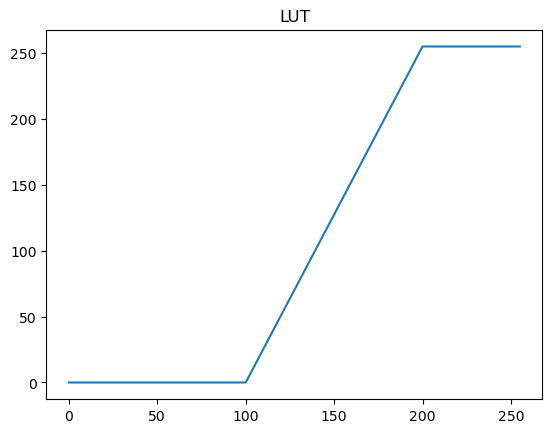

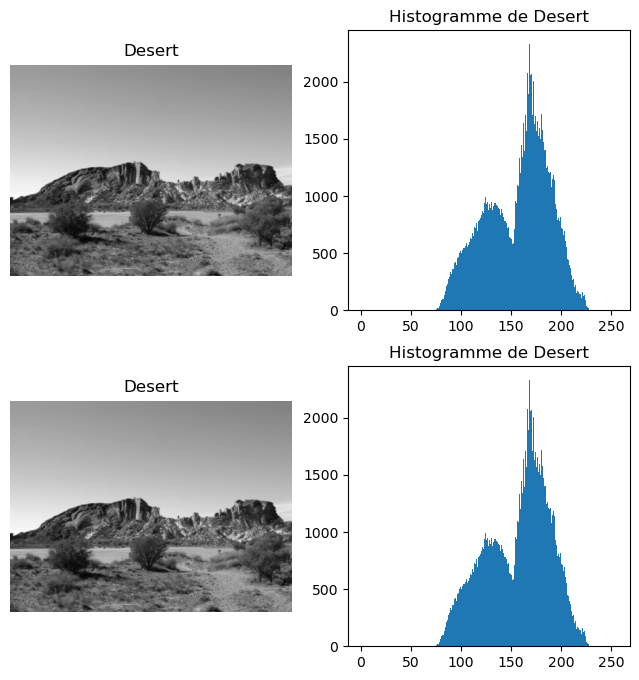

In [6]:
import numpy as np

# Verifier que la fonction LUT est bien definie
LUT_x = np.arange(256)
LUT_y = np.array([LUT(x, 100, 200) for x in LUT_x])
fig,ax = plt.subplots()
ax.plot(LUT_x, LUT_y)
ax.set_title('LUT')

fig,ax = plt.subplots(2,2,figsize=(8,8))
# Charger et afficher l'image
img = np.array(plt.imread('desert.bmp'))
ax[0,0].imshow(img)
ax[0,0].set_axis_off()
ax[0,0].set_title('Desert')

# Afficher l'histogramme
_,_,_ = ax[0,1].hist(img.flatten(),bins=256, width=1,range=(0,256))
ax[0,1].set_title('Histogramme de Desert')

# Appliquer une LUT a l'image
img_2 = copy(img)

# Transformation sans perte d'information
# A COMPLETER
def LUT_sans_perte(p, min_pixel, max_pixel):
    a = 255 / (max_pixel - min_pixel)
    return np.clip(a * (p - min_pixel), 0, 255)

# Transformation avec perte d'information
# A COMPLETER
def LUT_avec_perte(p, min_pixel, max_pixel):
    a = 127 / (max_pixel - min_pixel)  # Réduit l'intervalle de moitié
    return np.clip(a * (p - min_pixel), 0, 255)

# Afficher la nouvelle image
ax[1,0].imshow(img_2)
ax[1,0].set_axis_off()
ax[1,0].set_title('Desert')

# Afficher le nouvel histogramme
_,_,_ = ax[1,1].hist(img_2.flatten(),bins=256, width=1,range=(0,256))
ax[1,1].set_title('Histogramme de Desert')


# Exercice 5
## Détermination automatique de $p_0$ et $p_1$

Soit $I$ une image de taille $M\times N$.

Soit $s\in[0,100]$ une valeur choisie par l'utilisateur. On choisit $p_0$ (respectivement $p_1$) de telle manière que $s\%$ des pixels de l'image $I$ aient une valeur plus petite que $p_0$ (respectivement plus grande que $p_1$).

Autrement dit, soit $H$ l'histogramme cumulé de $I$, $p_0$ est la plus petite valeur $p$ telle que $\frac{H(p)}{MN} \geq s/100$, et $p_1$ est la plus grande valeur $p$ telle que $\frac{H(p)}{MN} \leq 1 - s/100$.

* Modifiez la cellule ci-dessous pour déterminer $p_0$ et $p_1$.

_**Astuce** : pour $p_0$, parcourir l'histogramme cumulé $H$ à partir de la valeur de pixel 0 ; pour $p_1$, parcourir $H$ dans le sens inverse (donc à partir de l'indice 255)._

* Testez votre code avec l'image `desert.bmp`, par exemple avec un seuil de 1% :

* Les valeurs de $p_0$ et $p_1$ sont-elles proches de celles que vous avez choisies dans l'exercice précédent ? Essayez avec d'autres valeurs du seuil et affichez les images correspondantes.

* Faites de même pour les images `manoir.bmp` et `fruits.bmp`.


p0= 41
p1= 225


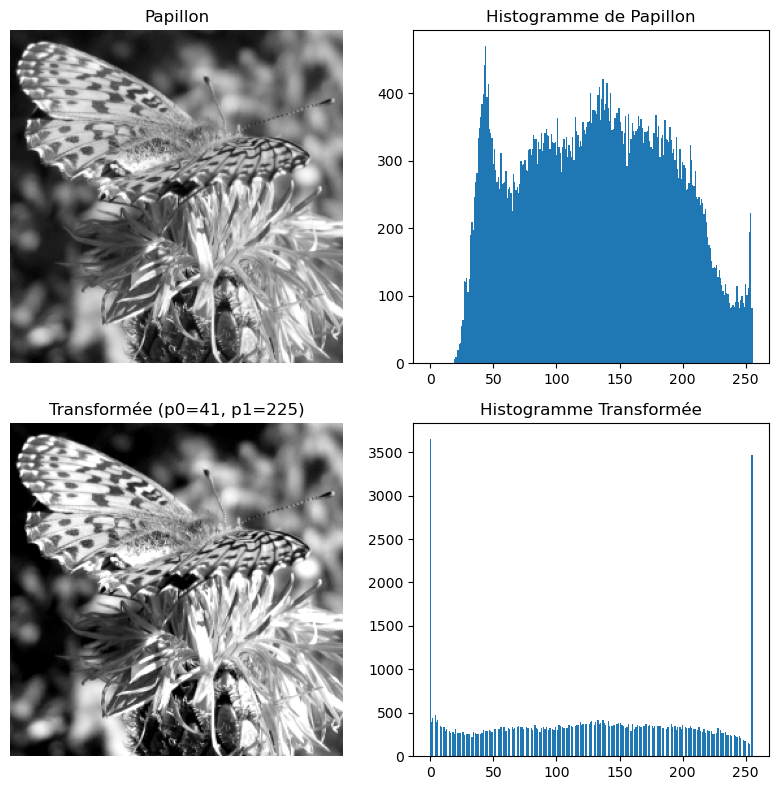

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Charger et afficher l'image
img = np.array(plt.imread('papillon.bmp'))

if img.ndim == 3:
    img = np.mean(img, axis=2).astype(np.uint8)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_axis_off()
ax[0, 0].set_title('Papillon')

M, N = img.shape

img = np.clip(img, 0, 255).astype(np.uint8)

hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] += 1

ax[0, 1].bar(range(256), hist, width=1, align='center')
ax[0, 1].set_title('Histogramme de Papillon')

H = np.cumsum(hist)

s = 5  
nb_pixels = M * N
low = s / 100 * nb_pixels  
high = (1 - s / 100) * nb_pixels  
p0 = np.searchsorted(H, low)
p1 = np.searchsorted(H, high) - 1

print(f'p0= {p0}')
print(f'p1= {p1}')


def LUT(val, p0, p1):
    
    slope = 255 / (p1 - p0)
    if val <= p0:
        return 0
    elif val >= p1:
        return 255
    else:
        return (val - p0) * slope


def apply_LUT(image, p0, p1):
    
    im = image.copy()
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im[i, j] = LUT(im[i, j], p0, p1)
    return im


imt = apply_LUT(img, p0, p1)

ax[1, 0].imshow(imt, cmap='gray')
ax[1, 0].set_title(f'Transformée (p0={p0}, p1={p1})')
ax[1, 0].axis('off')


hist_transformed = np.zeros(256)
for i in range(imt.shape[0]):
    for j in range(imt.shape[1]):
        hist_transformed[imt[i, j]] += 1

ax[1, 1].bar(range(256), hist_transformed, width=1, align='center')
ax[1, 1].set_title('Histogramme Transformée')

plt.tight_layout()
plt.show()

# Exercice 6
## Egalisation d'histogramme

Pour une image $I_1(u,v)$ de taille $M\times N$ dont l'histogramme cumulé est $H_1(p)$, l'égalisation d'histogramme consiste à transformer $I_1(u,v)$ en une image $I_2(u,v) = T(I_1(u,v))$ de manière à ce que le nouvel histogramme cumulé $H_2$ soit le plus linéaire possible. Pour cela, on applique la
transformation suivante aux pixels de l'image :

$ T(p) = \frac{255}{MN}H_1(p). $

* Dans la cellule ci-dessous, définir une fonction `egalisation` qui calcule la nouvelle valeur `T(p)` puis mettre en oeuvre l'égalisation d'histogramme et la tester sur `fruits.bmp`.

* Commenter les allures de l'histogramme et de l'histogramme cumulé de la nouvelle image par rapport à ceux de l'image originale.

* Commenter l'aspect visuel de la nouvelle image. Que pensez-vous du résultat par rapport à la correction affine ?

* Appliquer une deuxième fois l'égalisation d'histogramme. Qu'observez-vous ? Comment l'expliquer ?

* Que pensez-vous de l'égalisation appliquée à l'image `cellules.bmp` ?


Text(0.5, 1.0, 'Histogramme cumulé après égalisation')

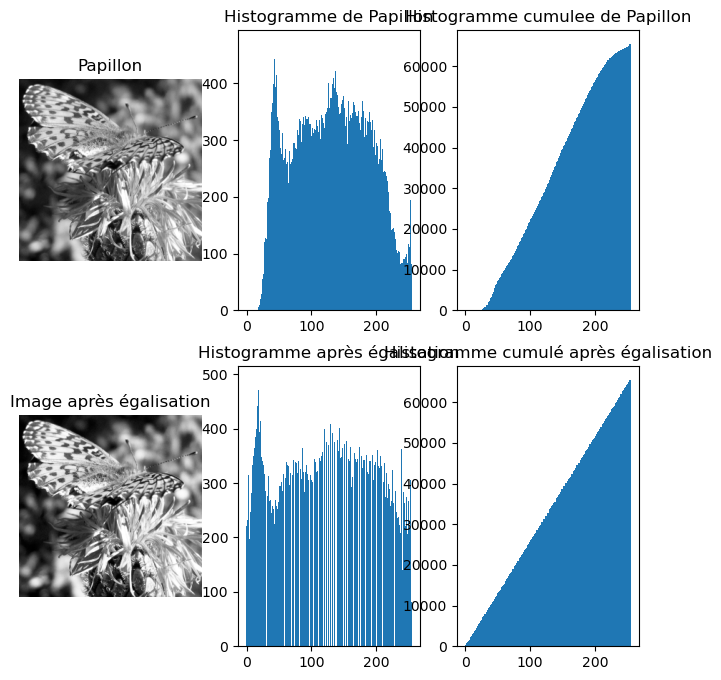

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy


fig,ax = plt.subplots(2,3,figsize=(8,8))
# Charger et afficher l'image
img = np.array(plt.imread('papillon.bmp'))
ax[0,0].imshow(img)
ax[0,0].set_axis_off()
ax[0,0].set_title('Papillon')
M, N = img.shape

# Calculer l'histogramme: white box (on en aura besoin plus bas)
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i, j]] = hist[img[i, j]] + 1

# Afficher l'histogramme
ax[0, 1].bar(range(256), hist, width=1, align='center')
ax[0, 1].set_title('Histogramme de Papillon')

# Histogramme cumule: calcul optimise
H1 = np.zeros(256)
H1[0] = hist[0]
for i in range(1, 256):
    H1[i] = H1[i-1] + hist[i]

# Afficher histogramme cumule
ax[0, 2].bar(range(256), H1, width=1, align='center')
ax[0, 2].set_title('Histogramme cumulee de Papillon')

# NB: vous pouvez remplacer les 2 calculs d'hist plus haut par des appels
# à la fonction show_histogram (voir la doc de cette fonction dans utils.py)

# Transformation d'egalisation d'histogramme
def egalisation(img, hist_cumul):
    MN = img.size
    T = (255 / MN) * hist_cumul  # Transformation T(p)
    T = T.astype(np.uint8)  # S'assurer que T est dans l'intervalle [0, 255]
    
    # Appliquer la transformation T(p) à chaque pixel
    img_egalise = np.zeros_like(img)
    for i in range(M):
        for j in range(N):
            img_egalise[i, j] = T[img[i, j]]
    return img_egalise

# Appliquer l'égalisation d'histogramme
img_egalise = egalisation(img, H1)

# Calculer l'histogramme égalisé
hist_egalise = np.zeros(256)
for i in range(M):
    for j in range(N):
        hist_egalise[img_egalise[i, j]] += 1

# Calculer l'histogramme cumulé égalisé
H2 = np.cumsum(hist_egalise)

# Afficher la nouvelle image
ax[1, 0].imshow(img_egalise)
ax[1, 0].set_axis_off()
ax[1, 0].set_title("Image après égalisation")

# Afficher les histogrammes égalisés
#fig_egalise, ax_egalise = plt.subplots(1, 2, figsize=(12, 5))
ax[1,1].bar(range(256), hist_egalise, width=1, align='center')
ax[1,1].set_title("Histogramme après égalisation")

ax[1,2].bar(range(256), H2, width=1, align='center')
ax[1,2].set_title("Histogramme cumulé après égalisation")

# Exercice 7
## Segmentation par seuillage

La segmentation d'une image consiste à identifier des classes de pixels suivant certains critères. C'est un domaine de recherche encore très actif dans des domaines tels que l'imagerie médicale (pour segmenter les organes).

Par exemple dans l'image `tomates.bmp`, on constate que le fond est nettement plus sombre que les tomates, et on peut choisir comme critère un seuil d'intensité $s$ :
un pixel donné appartient à la classe **fond** si sa valeur est inférieure à $s$, et à la classe **tomate** sinon.

* Visualiser l'histogramme de l'image `tomates.bmp` et identifier une valeur plausible du seuil $s$ qui permette de séparer le fond des tomates.

* Dans la cellule ci-dessous implémenter la fonction `threshold` suivante :

$ T(p) =
\left\lbrace
\begin{array}{ccc}
      255 & \text{si} & p > s,\\
      0 & \text{sinon.}
\end{array}
\right.
$  
Vous pouvez la tester de la façon suivante, en faisant varier le seuil $s$ autour de la valeur que vous avez évaluée précédemment.

* Dans le même esprit que le TP précédent, vous pouvez créer un masque puis utiliser le produit entre deux `numpy.ndarray` pour afficher les tomates sans le fond, ou le fond sans les tomates :

* Il y a un message caché dans le fond de l'image `tomates.bmp` saurez-vous le rendre clairement visible ?

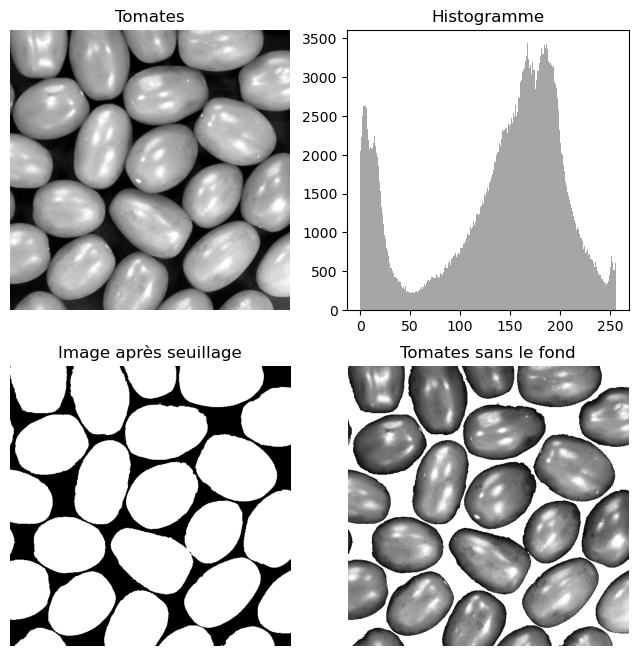

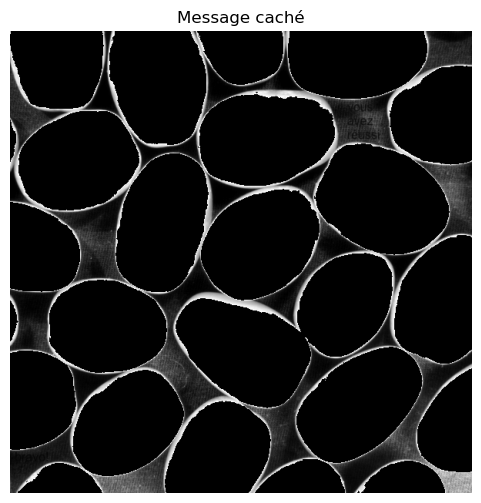

In [8]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
# Charger et afficher l'image
img = np.array(plt.imread('tomates.bmp'))
ax[0,0].imshow(img)
ax[0,0].set_axis_off()
ax[0,0].set_title('Tomates')

# Afficher l'histogramme
ax[0, 1].hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
ax[0, 1].set_title('Histogramme')

# Fonction de seuillage
def threshold(img, s):
    img_th = copy(img)
    # A COMPLETER
    img_th[img_th < s] = 0  
    img_th[img_th >= s] = 255
    return img_th

# Appliquer un seuillage
# A COMPLETER
seuil = 100
img_2 = threshold(img, seuil)

# Et afficher la nouvelle image img_2
ax[1, 0].imshow(img_2)
ax[1, 0].set_axis_off()
ax[1, 0].set_title('Image après seuillage')

# Afficher les tomates sans le fonds.
# A COMPLETER
img_3 = np.copy(img)
img_3[img_2 == 0] = 255  
ax[1, 1].imshow(img_3)
ax[1, 1].set_axis_off()
ax[1, 1].set_title('Tomates sans le fond')
plt.show()
fond = np.copy(img)
fond[img_2 == 255] = 0
fond = (fond - fond.min()) * (255 / (fond.max() - fond.min()))
# Afficher le fonds sans les tomates
# A COMPLETER
plt.figure(figsize=(6, 6))
plt.imshow(fond, cmap='gray')
plt.axis('off')
plt.title("Message caché")
plt.show()
# A COMPLETER : Chercher le message caché dans le fonds.